In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygbif

# Load the data
data = pd.read_csv('../data/biodiversity/raw/0017344-250310093411724.csv', delimiter="\t")

C:\Users\olexs\AppData\Local\Temp\ipykernel_6404\4234054125.py:7: DtypeWarning: Columns (10,14,16,36,37,38,39,40,41,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/biodiversity/raw/0017344-250310093411724.csv', delimiter="\t")


Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')


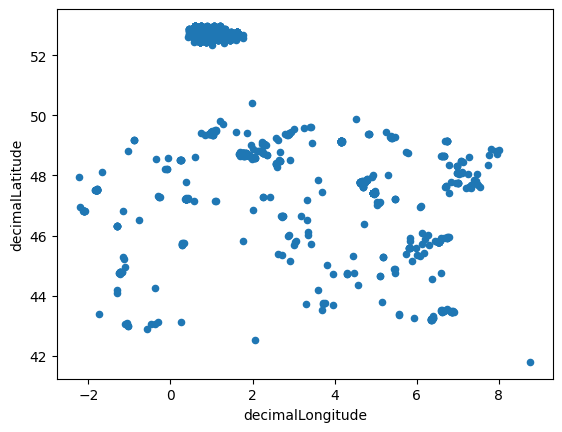

In [3]:
print(data.columns)
data.head(1000).plot(x='decimalLongitude', y='decimalLatitude', kind='scatter')
plt.show()

25540
0.9010292953285828
0.8888888888888888
0.8980169971671388
0.9149868536371604
0.9030448717948718
0.8903133903133903
0.9282970550576184
0.9227416798732171
0.9160070360598065
0.9053662073966643
0.8986024382991377
0.9012118018967334
0.8984563434635794
0.9103166496424924
0.917985927880387
0.9162123965273572
0.9097197587797091
0.9194235178512938
0.9246165843514427
0.9344398340248963


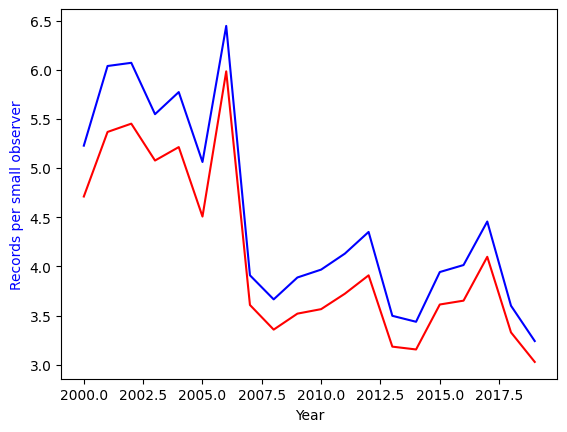

In [4]:
relevant_data = data[["gbifID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "countryCode", "occurrenceStatus", "decimalLatitude", "decimalLongitude", "day", "month", "year", "recordedBy"]]

print((relevant_data["species"].loc[relevant_data["year"] == 2019].value_counts()["Bufo bufo"]))

x = range(2000, 2020)
y_1 = []
y_2 = []
y_3 = []
for year in x:
    num_records = relevant_data["species"].loc[relevant_data["year"] == year].value_counts()["Bufo bufo"]
    observers = relevant_data["recordedBy"].loc[relevant_data["year"] == year].value_counts()
    small_observers = observers[observers < 10]
    num_small_observers = len(small_observers)
    
    y_1.append(num_records / num_small_observers)
    y_2.append(num_records/len(observers))
    y_3.append(num_records)
    print(num_small_observers/len(observers))

fig, ax1 = plt.subplots()

ax1.plot(x, y_1, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Records per small observer', color='b')
ax1.plot(x, y_2, 'r-')
#ax1.plot(x, y_3, 'g-')
plt.show()

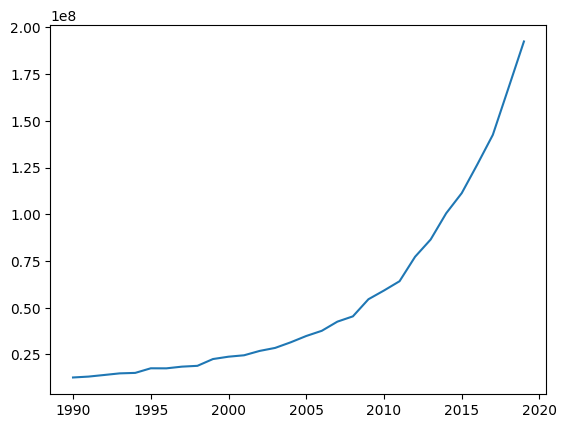

In [6]:

plt.plot(range(1990,2020), [pygbif.occurrences.search(year = x)["count"] for x in range(1990,2020)])
plt.show()

39736
12594597
0.0031550036892804114
41717
13069460
0.0031919451913085925
41063
13925169
0.0029488331524019566
43576
14794190
0.002945480624488397
44664
15045317
0.0029686313688172873
48505
17512342
0.0027697608920611533
48620
17482859
0.0027810096735322296
52928
18392744
0.0028776565367299193
64467
18826884
0.0034241991399107784
89473
22462461
0.00398322338767778
104166
23722008
0.004391112253229153
111317
24476434
0.004547925567915653
113386
26808695
0.004229448691926258
130287
28424728
0.004583579480514291
138838
31424345
0.0044181668703038995
170190
34803892
0.004889970351591713
199939
37583184
0.005319905838738943
250494
42476967
0.005897172460547854
285339
45314401
0.006296872378385847
455723
54479363
0.008365057425506242
403045
59152548
0.006813654079618007
480281
64119749
0.007490375547165663
627844
77222705
0.008130303127817136
757740
86440073
0.008766073115185824
907255
100499424
0.009027464674822416
1028885
111282041
0.00924574163768258
1193369
126599985
0.00942629653550117


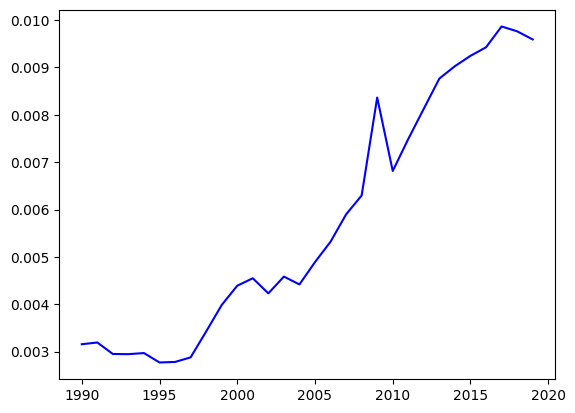

In [ ]:
from pygbif import species
from pygbif import occurrences

species_name = "Sturnus vulgaris"
species_key = species.name_backbone(name=species_name)["usageKey"]

x = range(1990, 2020)
y_species = []
y_general = []
y_proportion = []
for year in x:
    num_records_species = pygbif.occurrences.search(taxonKey=species_key, year=year)["count"]
    num_record_general = pygbif.occurrences.search(year=year)["count"]
    y_species.append(num_records_species)
    y_general.append(num_record_general)
    y_proportion.append(num_records_species/num_record_general)
fig, ax1 = plt.subplots()
#generate plot
ax1.plot(x, y_proportion, 'b-')
plt.show()